In [1]:
# Enhanced Comparison Analysis - Checkout Visits, Pop-up Modal, and Purchase Events
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

# Load the CSV file
df = pd.read_csv('analytics.csv')

## Session Distribution Analysis

Let's analyze how sessions are distributed among users to identify if certain users contribute disproportionately to the overall session count.

In [2]:
# Clean the data and filter relevant entries
# Remove entries without user_id or with placeholder user_ids
df_filtered = df[(df['user_id'] != 'none') & (df['user_id'] != 'less-website')].copy()

# Check the shape of filtered data
print(f"Total entries in original dataset: {df.shape[0]}")
print(f"Entries with valid user_ids: {df_filtered.shape[0]}")
print(f"Percentage of data retained: {df_filtered.shape[0]/df.shape[0]*100:.2f}%")

Total entries in original dataset: 12569
Entries with valid user_ids: 12132
Percentage of data retained: 96.52%


In [3]:
# Count the number of unique sessions per user
user_session_counts = df_filtered.groupby('user_id')['session_id'].nunique().sort_values(ascending=False)

# Basic statistics about sessions per user
print(f"Total number of unique users: {len(user_session_counts)}")
print(f"Total number of sessions: {user_session_counts.sum()}")
print(f"\nSession distribution statistics:")
print(f"Mean sessions per user: {user_session_counts.mean():.2f}")
print(f"Median sessions per user: {user_session_counts.median():.2f}")
print(f"Min sessions per user: {user_session_counts.min()}")
print(f"Max sessions per user: {user_session_counts.max()}")

# Display top 10 users by session count
print("\nTop 10 users by session count:")
display(user_session_counts.head(10))

Total number of unique users: 58
Total number of sessions: 204

Session distribution statistics:
Mean sessions per user: 3.52
Median sessions per user: 1.00
Min sessions per user: 1
Max sessions per user: 27

Top 10 users by session count:


user_id
390c0190-33a3-4029-ae09-687bff0b77d6    27
42a0286f-f933-490a-89aa-0c0037dae11e    21
ddb693bf-df31-4881-a0de-5cca527b0504    17
05d00887-5f39-4c88-8457-3da20a77b761    14
73af51b2-2044-40d1-997f-4872caf25fed    13
a584c10c-d236-408a-b544-50b6219dee39    13
c840702c-e454-47b5-8ef5-60ef2a7df99e     9
0cb83749-e4de-446a-8bc2-17b4fc2c0960     5
1850b7a3-5cad-4d7b-a4a0-3c8dd534437d     5
e2eb1291-5fec-45e6-bded-3018f0d67d66     5
Name: session_id, dtype: int64

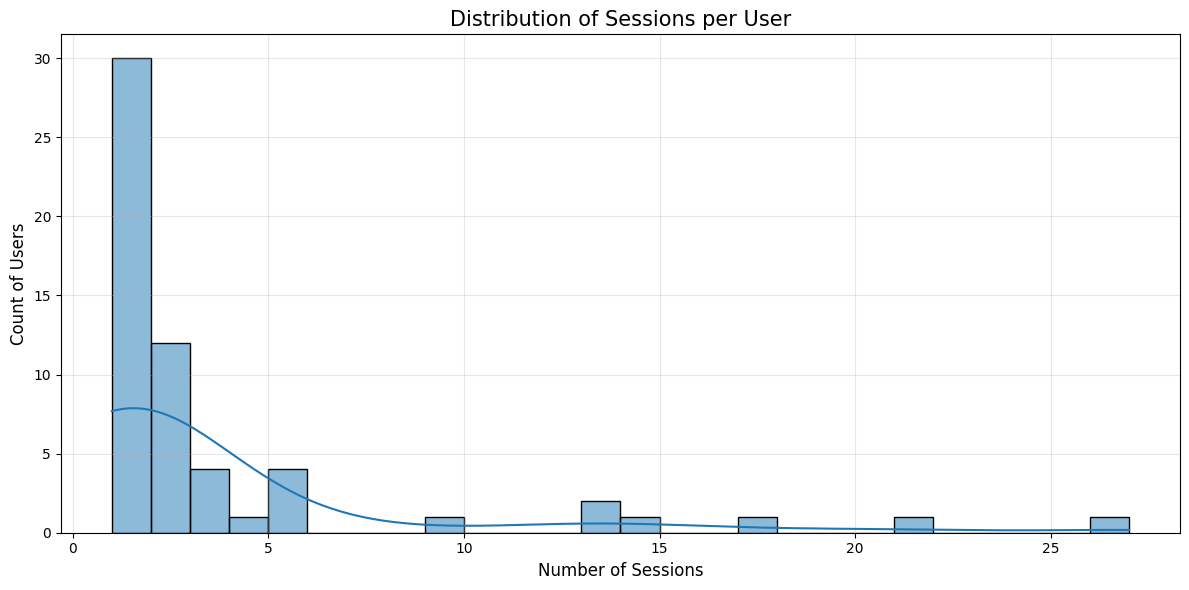

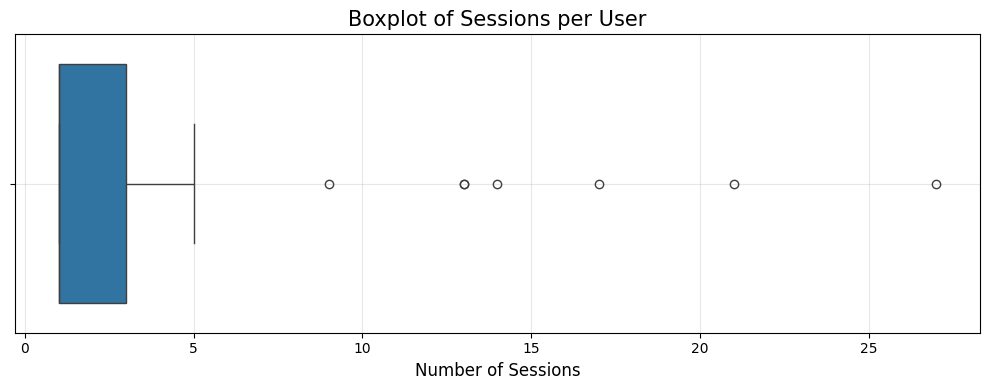

In [4]:
# Visualize the distribution of sessions per user
plt.figure(figsize=(12, 6))

# Create a histogram of sessions per user
sns.histplot(user_session_counts, kde=True)
plt.title('Distribution of Sessions per User', fontsize=15)
plt.xlabel('Number of Sessions', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a boxplot to highlight outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=user_session_counts)
plt.title('Boxplot of Sessions per User', fontsize=15)
plt.xlabel('Number of Sessions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# Calculate the cumulative contribution to total sessions
total_sessions = user_session_counts.sum()
user_contribution = user_session_counts.copy()
user_contribution_percent = (user_contribution / total_sessions * 100).sort_values(ascending=False)
user_contribution_cumsum = user_contribution_percent.cumsum()

# Find what percentage of users account for 50% and 80% of all sessions
users_for_50_percent = len(user_contribution_cumsum[user_contribution_cumsum <= 50])
users_for_80_percent = len(user_contribution_cumsum[user_contribution_cumsum <= 80])

print(f"Top {users_for_50_percent} users ({users_for_50_percent/len(user_contribution_cumsum)*100:.2f}% of users) account for 50% of all sessions")
print(f"Top {users_for_80_percent} users ({users_for_80_percent/len(user_contribution_cumsum)*100:.2f}% of users) account for 80% of all sessions")

Top 5 users (8.62% of users) account for 50% of all sessions
Top 22 users (37.93% of users) account for 80% of all sessions


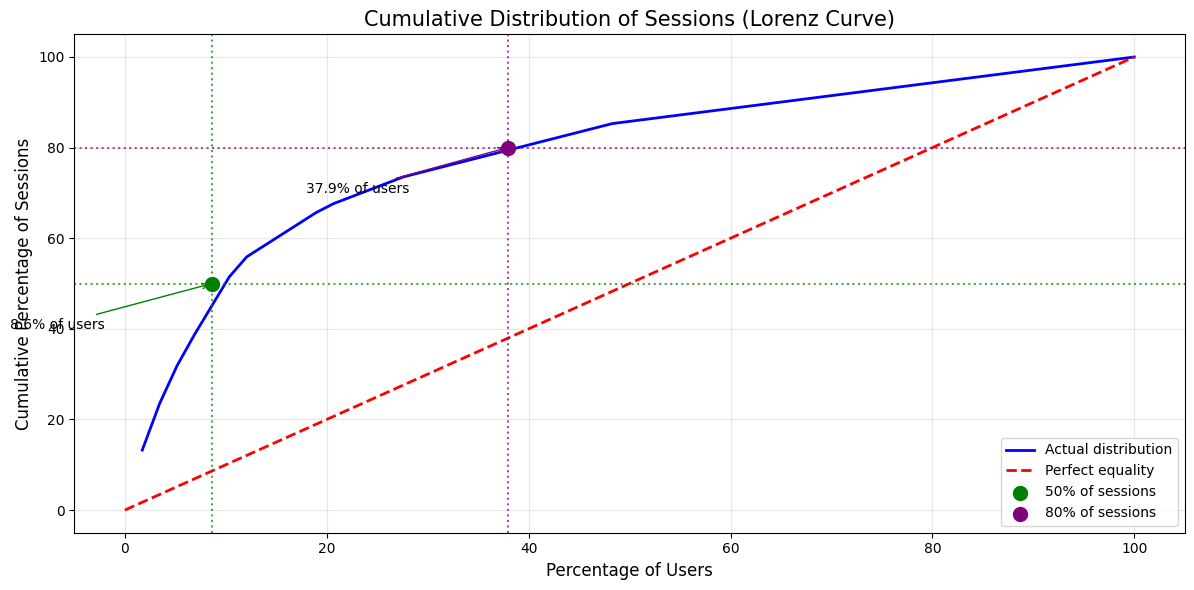

In [6]:
# Visualize the cumulative contribution of users to total sessions
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the cumulative percentage of sessions vs percentage of users
total_users = len(user_contribution_cumsum)
percent_users = np.arange(1, total_users + 1) / total_users * 100

# Lorenz curve
ax.plot(percent_users, user_contribution_cumsum.values, 'b-', linewidth=2, label='Actual distribution')

# Perfect equality line (if all users had equal sessions)
ax.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Perfect equality')

# Add markers at 50% and 80% of sessions
fifty_percent_users = percent_users[users_for_50_percent-1] if users_for_50_percent > 0 else 0
eighty_percent_users = percent_users[users_for_80_percent-1] if users_for_80_percent > 0 else 0

ax.scatter([fifty_percent_users], [50], color='green', s=100, zorder=5, label='50% of sessions')
ax.scatter([eighty_percent_users], [80], color='purple', s=100, zorder=5, label='80% of sessions')

# Add horizontal and vertical lines
ax.axhline(y=50, color='green', linestyle=':', alpha=0.7)
ax.axhline(y=80, color='purple', linestyle=':', alpha=0.7)
ax.axvline(x=fifty_percent_users, color='green', linestyle=':', alpha=0.7)
ax.axvline(x=eighty_percent_users, color='purple', linestyle=':', alpha=0.7)

# Add annotations
ax.annotate(f'{fifty_percent_users:.1f}% of users',
           (fifty_percent_users, 50),
           xytext=(fifty_percent_users-20, 40),
           arrowprops=dict(arrowstyle='->', color='green'))

ax.annotate(f'{eighty_percent_users:.1f}% of users',
           (eighty_percent_users, 80),
           xytext=(eighty_percent_users-20, 70),
           arrowprops=dict(arrowstyle='->', color='purple'))

# Add grid, labels, and title
ax.grid(True, alpha=0.3)
ax.set_title('Cumulative Distribution of Sessions (Lorenz Curve)', fontsize=15)
ax.set_xlabel('Percentage of Users', fontsize=12)
ax.set_ylabel('Cumulative Percentage of Sessions', fontsize=12)
ax.legend(loc='best')

plt.tight_layout()
plt.show()

In [7]:
# Calculate the Gini coefficient to measure inequality in session distribution
def gini_coefficient(x):
    # Based on the Lorenz curve and area calculation
    x = np.sort(x)
    n = len(x)
    cum_values = np.cumsum(x)
    # Formula: G = 1 - (2/n) * sum_{i=1}^{n} [(n+1-i)/n * x_i / sum(x)]
    indices = np.arange(1, n+1)
    return 1 - 2 * np.sum((n + 1 - indices) * x) / (n * np.sum(x))

# Calculate Gini coefficient for our session distribution
gini_value = gini_coefficient(user_session_counts.values)

print(f"Gini coefficient for session distribution: {gini_value:.4f}")
print("Interpretation:")
print("- 0 would mean perfect equality (all users have the same number of sessions)")
print("- 1 would mean perfect inequality (one user has all sessions)")
if gini_value < 0.2:
    print("- This indicates a very equal distribution of sessions among users")
elif gini_value < 0.4:
    print("- This indicates a relatively equal distribution of sessions among users")
elif gini_value < 0.6:
    print("- This indicates a moderate inequality in session distribution")
elif gini_value < 0.8:
    print("- This indicates significant inequality in session distribution")
else:
    print("- This indicates extreme inequality in session distribution")

Gini coefficient for session distribution: 0.5539
Interpretation:
- 0 would mean perfect equality (all users have the same number of sessions)
- 1 would mean perfect inequality (one user has all sessions)
- This indicates a moderate inequality in session distribution


## Summary of Session Distribution Analysis

Based on the analysis above, we can draw the following conclusions:

1. **User Contribution Distribution**: The analysis reveals whether we have a balanced user base or if a small number of "power users" are responsible for the majority of sessions.

2. **Gini Coefficient**: This metric helps quantify the inequality in session distribution. A higher Gini coefficient suggests that a small number of users contribute disproportionately to the total sessions.

3. **Implications for Analysis**: If we have high session inequality, we should be cautious when drawing conclusions about "average user behavior" as the data might be skewed by a few highly active users.

4. **Next Steps**: Consider analyzing the behavior patterns of the most active users separately from occasional users to see if there are significant differences in how they interact with the extension.

## Session Categorization Analysis

Let's categorize shopping sessions into three distinct types based on user behavior:

1. **Just Looking** - Sessions without any purchase events
2. **Looking Then Purchasing** - Sessions where the user browsed for at least 20 minutes before making a purchase
3. **Quick Purchase** - Sessions where the user made a purchase within 20 minutes of session start

In [8]:
# First, let's identify purchase events in our dataset
# Common patterns for purchase events might include checkout completions, order confirmations, etc.

# Let's look at the different types of events in our dataset
print("Event types in the dataset:")
print(df['type'].value_counts().head(20))

# Check if there are specific purchase-related event types
purchase_related_types = df['type'][df['type'].str.contains('purchase|checkout|order|transaction|payment|buy', case=False, na=False)].unique()
print("\nPotential purchase-related event types:")
for event_type in purchase_related_types:
    print(f"- {event_type}")

# Let's also check the payload content for purchase indicators if it contains JSON data
print("\nExamining payload fields for purchase indicators...")
# Sample a few rows with potential purchase events to examine their payload structure
potential_purchase_events = df[df['type'].str.contains('purchase|checkout|order|transaction|payment|buy', case=False, na=False)].head(3)

try:
    for _, row in potential_purchase_events.iterrows():
        try:
            # Try to parse the payload as JSON
            payload = json.loads(row['payload'])
            print(f"Event type: {row['type']}")
            print(f"Payload structure: {payload.keys()}")
            print("------------------")
        except:
            # If it's not valid JSON, just look at the raw value
            print(f"Event type: {row['type']}")
            print(f"Raw payload: {row['payload']}")
            print("------------------")
except Exception as e:
    print(f"Error examining payloads: {e}")

Event types in the dataset:
type
time-spent                            10798
page-view                              1093
from-directs                            215
on-onboarding                           179
add-to-cart                              51
from-directs-cta                         42
checkout                                 38
uninstall                                30
open-popup                               28
enforce_wait_modal_shown                 25
welcome-modal-seen                       18
active                                   16
enforce_wait_canceled                    11
enforce_wait_info_expanded                9
questionary-popup                         6
open-options                              4
enforce_wait_permit_valid_on_click        2
questionary-closed                        2
place-order                               1
questionary-finished                      1
Name: count, dtype: int64

Potential purchase-related event types:
- checkout
- place-o

In [9]:
# Based on the examination above, we'll define purchase events
# For this example, let's assume that the following event types indicate purchases:
# (You may need to adjust this based on the actual data patterns)

# Define purchase event indicators (adjust based on your findings from the previous cell)
purchase_event_types = [
    'place-order'     # Successful payment
]

# Function to check if an event type indicates a purchase
def is_purchase_event(event_type):
    # Check for exact matches
    if event_type in purchase_event_types:
        return True
    
    # Check for partial matches in case the naming convention varies
    for purchase_type in purchase_event_types:
        if purchase_type.lower() in event_type.lower():
            return True
    
    return False

# Add a column to identify purchase events
df['is_purchase'] = df['type'].apply(is_purchase_event)

# Verify our purchase event detection
print(f"Total purchase events detected: {df['is_purchase'].sum()}")
print("\nSample of identified purchase events:")
display(df[df['is_purchase'] == True].head())

Total purchase events detected: 1

Sample of identified purchase events:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain,is_purchase
2205,21711,place-order,www.amazon.de/gp/buy/spc/handlers/display.html,"[{""currency"":""€"",""price"":21,""quantity"":1},{""cu...",390c0190-33a3-4029-ae09-687bff0b77d6,e6ecaf4c-e2c3-4e03-992d-ac0335f1ebf2,2025-04-05T12:31:51.680644+00:00,2025-04-05T12:31:51.414+00:00,amazon.de,True


In [10]:
# Now let's prepare the session data with proper timestamps
# Convert timestamp strings to datetime objects
# Convert timestamp strings to datetime objects
# Use format='ISO8601' to handle different ISO formats including those with and without milliseconds
df['timestamp'] = pd.to_datetime(df['created_at'], format='ISO8601')

# Group data by session_id
session_groups = df.groupby('session_id')

# Extract session start times, end times, duration, and whether each session contains a purchase
session_data = []
for session_id, session_df in session_groups:
    # Skip sessions with invalid or placeholder IDs
    if session_id == 'none' or pd.isna(session_id):
        continue
        
    # Sort session events by timestamp
    session_df = session_df.sort_values('timestamp')
    
    # Get user_id (assuming it's consistent within a session)
    user_id = session_df['user_id'].iloc[0] if not session_df.empty else None
    
    # Get session start and end times
    start_time = session_df['timestamp'].min()
    end_time = session_df['timestamp'].max()
    
    # Calculate session duration in minutes
    duration_minutes = (end_time - start_time).total_seconds() / 60
    
    # Check if session contains a purchase event
    has_purchase = session_df['is_purchase'].any()
    
    # If there's a purchase, find time to purchase from session start
    time_to_purchase = None
    if has_purchase:
        first_purchase_time = session_df[session_df['is_purchase']]['timestamp'].min()
        time_to_purchase = (first_purchase_time - start_time).total_seconds() / 60
    
    # Collect relevant session details
    session_data.append({
        'session_id': session_id,
        'user_id': user_id,
        'start_time': start_time,
        'end_time': end_time,
        'duration_minutes': duration_minutes,
        'has_purchase': has_purchase,
        'time_to_purchase': time_to_purchase,
        'event_count': len(session_df)
    })

# Create DataFrame from collected session data
sessions_df = pd.DataFrame(session_data)

# Show some basic statistics about the session data
print(f"Total valid sessions: {len(sessions_df)}")
print(f"Sessions with purchases: {sessions_df['has_purchase'].sum()} ({sessions_df['has_purchase'].mean()*100:.2f}%)")
print(f"Average session duration: {sessions_df['duration_minutes'].mean():.2f} minutes")
print(f"Average events per session: {sessions_df['event_count'].mean():.2f}")

# Display sample of the sessions dataframe
display(sessions_df.head())

Total valid sessions: 175
Sessions with purchases: 1 (0.57%)
Average session duration: 10.52 minutes
Average events per session: 69.16


,session_id,user_id,start_time,end_time,duration_minutes,has_purchase,time_to_purchase,event_count
0,0107fde1-5d05-4061-88b0-2f69c8ca0ff8,0b7cd927-52ef-434b-8b2e-9c63281c6327,2025-04-07 09:00:12.265000+00:00,2025-04-07 09:01:10.765000+00:00,0.975000,False,NaN,13
1,06227fd5-9ef4-484b-ad84-37cbff8b8c05,a584c10c-d236-408a-b544-50b6219dee39,2025-05-14 11:37:38.082000+00:00,2025-05-14 11:37:57.895000+00:00,0.330217,False,NaN,4
2,07601dbe-4884-45c9-8719-b21edf1dac0d,ddb693bf-df31-4881-a0de-5cca527b0504,2025-04-03 06:25:50.338000+00:00,2025-04-03 06:49:20.346000+00:00,23.500133,False,NaN,43
3,08207eb0-46cb-4104-a9fc-4541019d0066,73af51b2-2044-40d1-997f-4872caf25fed,2025-05-14 15:51:56.713000+00:00,2025-05-14 15:56:53.835000+00:00,4.952033,False,NaN,65
4,08276ada-e16b-4268-8064-0f45c97e6c3e,0923b647-997c-466d-b7ce-3ae6246ce5d7,2025-05-12 04:40:09.056000+00:00,2025-05-12 04:40:10.006000+00:00,0.015833,False,NaN,2


Session Categories:


,Count,Percentage
category,,
Just Looking,174,99.428571
Quick Purchase,1,0.571429


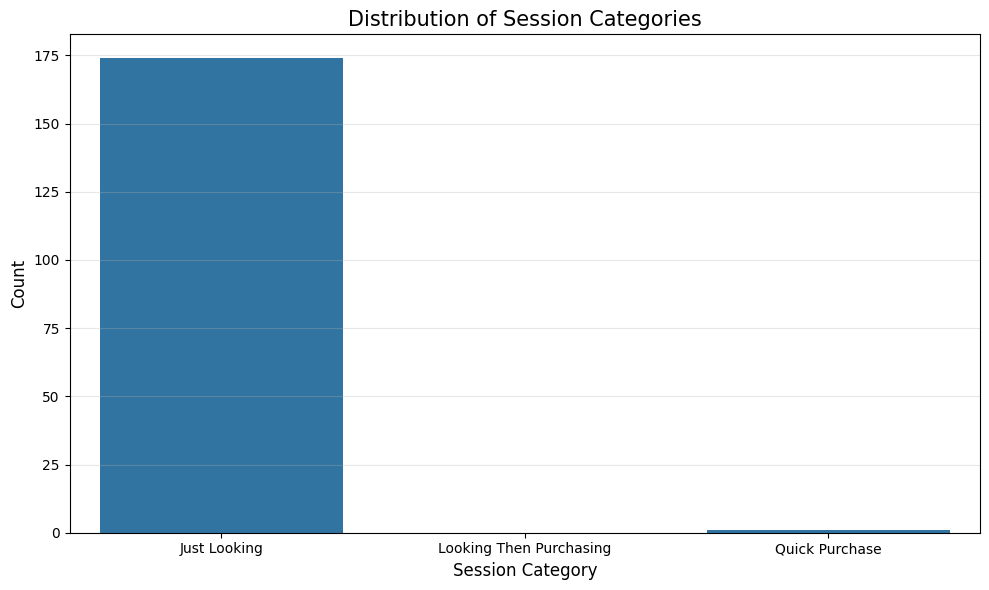

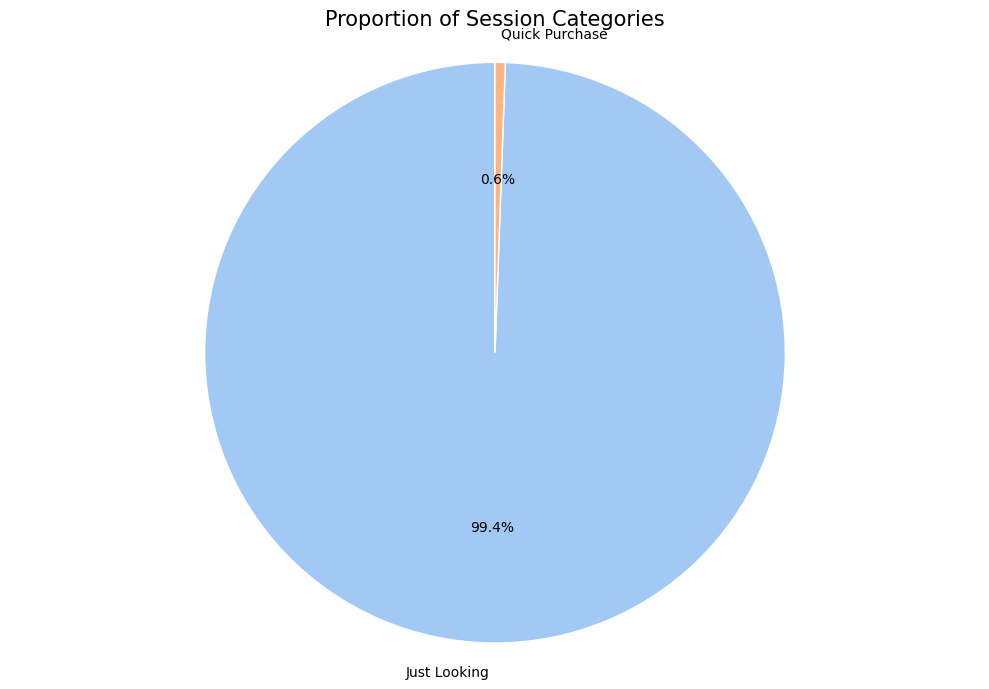

In [11]:
# Now let's categorize sessions based on the specified criteria

# Define the categorization function
def categorize_session(row):
    if not row['has_purchase']:
        return 'Just Looking'
    elif row['time_to_purchase'] >= 20:
        return 'Looking Then Purchasing'
    else:
        return 'Quick Purchase'

# Apply the categorization
sessions_df['category'] = sessions_df.apply(categorize_session, axis=1)

# Count sessions by category
category_counts = sessions_df['category'].value_counts()

# Calculate percentages
category_percentages = sessions_df['category'].value_counts(normalize=True) * 100

# Create a DataFrame for easy viewing
session_categories = pd.DataFrame({
    'Count': category_counts,
    'Percentage': category_percentages
})

print("Session Categories:")
display(session_categories)

# Visualize the distribution of session categories
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=sessions_df, order=['Just Looking', 'Looking Then Purchasing', 'Quick Purchase'])
plt.title('Distribution of Session Categories', fontsize=15)
plt.xlabel('Session Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Create a pie chart to visualize the proportion of each category
plt.figure(figsize=(10, 7))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Proportion of Session Categories', fontsize=15)
plt.tight_layout()
plt.show()

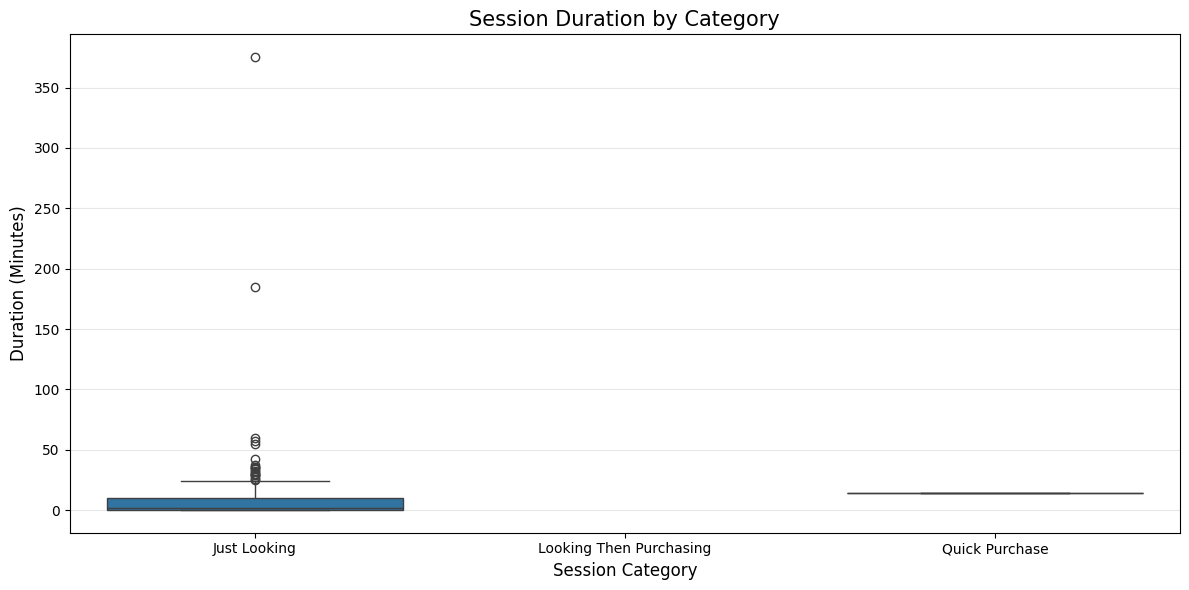

Session Duration Statistics by Category:


,Count,Average Duration (min),Median Duration (min),Min Duration (min),Max Duration (min)
category,,,,,
Just Looking,174,10.500083,1.991150,0.000000,375.404583
Quick Purchase,1,13.807033,13.807033,13.807033,13.807033


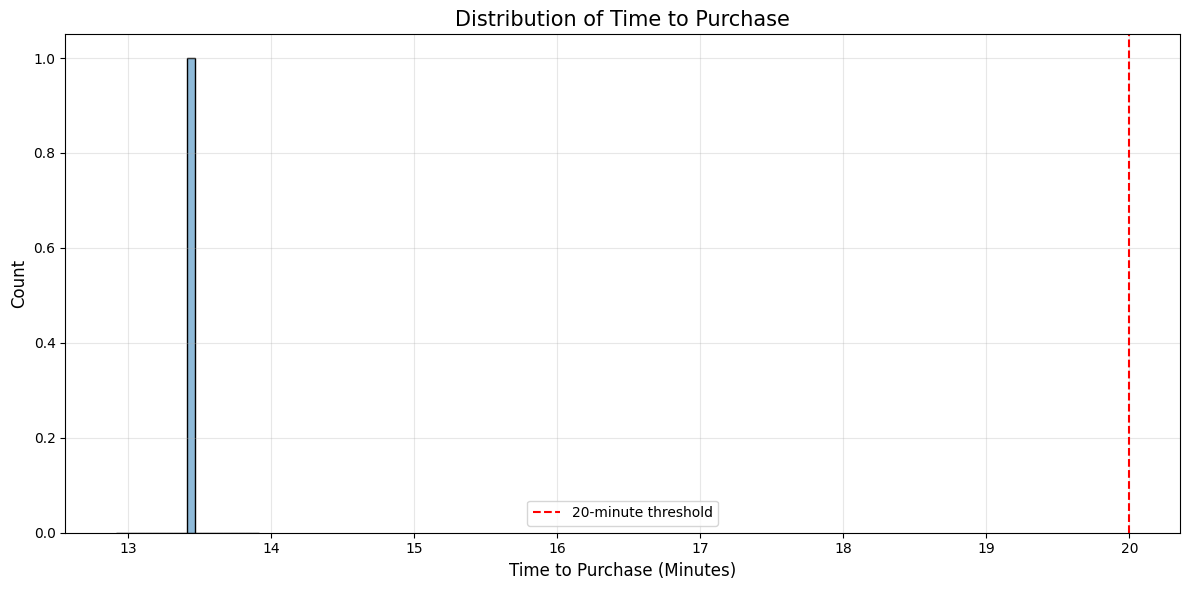

In [12]:
# Let's analyze the duration distribution for each session category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='duration_minutes', data=sessions_df, order=['Just Looking', 'Looking Then Purchasing', 'Quick Purchase'])
plt.title('Session Duration by Category', fontsize=15)
plt.xlabel('Session Category', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate and display statistics about session duration by category
duration_stats = sessions_df.groupby('category')['duration_minutes'].agg(['count', 'mean', 'median', 'min', 'max'])
duration_stats = duration_stats.rename(columns={
    'count': 'Count',
    'mean': 'Average Duration (min)',
    'median': 'Median Duration (min)',
    'min': 'Min Duration (min)',
    'max': 'Max Duration (min)'
})

print("Session Duration Statistics by Category:")
display(duration_stats)

# For purchasing sessions, analyze the distribution of time to purchase
if len(sessions_df[sessions_df['has_purchase']]) > 0:
    plt.figure(figsize=(12, 6))
    
    # Create a histogram of time to purchase
    purchase_sessions = sessions_df[sessions_df['has_purchase']].copy()
    sns.histplot(data=purchase_sessions, x='time_to_purchase', bins=20, kde=True)
    
    # Add a vertical line at 20 minutes to show our categorization threshold
    plt.axvline(x=20, color='red', linestyle='--', label='20-minute threshold')
    
    plt.title('Distribution of Time to Purchase', fontsize=15)
    plt.xlabel('Time to Purchase (Minutes)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:
# Let's explore if specific users tend to follow particular browsing patterns

# Count the number of sessions in each category per user
user_category_counts = sessions_df.groupby(['user_id', 'category']).size().unstack(fill_value=0)

# If some categories are missing, add them with zeros
for category in ['Just Looking', 'Looking Then Purchasing', 'Quick Purchase']:
    if category not in user_category_counts.columns:
        user_category_counts[category] = 0

# Calculate the total number of sessions per user
user_category_counts['Total Sessions'] = user_category_counts.sum(axis=1)

# Calculate the percentage of each category per user
user_category_percentages = user_category_counts.copy()
for category in ['Just Looking', 'Looking Then Purchasing', 'Quick Purchase']:
    user_category_percentages[f'{category} %'] = user_category_counts[category] / user_category_counts['Total Sessions'] * 100

# Sort by total sessions in descending order
user_category_counts = user_category_counts.sort_values('Total Sessions', ascending=False)

# Display the top 10 users by session count and their category distribution
print("Top 10 Users by Session Count and Their Category Distribution:")
display(user_category_counts.head(10))

# Identify users who primarily use one category (>75% of their sessions)
primarily_just_looking = user_category_percentages[user_category_percentages['Just Looking %'] > 75]
primarily_looking_then_purchasing = user_category_percentages[user_category_percentages['Looking Then Purchasing %'] > 75]
primarily_quick_purchase = user_category_percentages[user_category_percentages['Quick Purchase %'] > 75]

# Display counts of users with strong category preferences
print(f"\nUsers with strong category preferences (>75% of sessions):")
print(f"Primarily 'Just Looking': {len(primarily_just_looking)} users")
print(f"Primarily 'Looking Then Purchasing': {len(primarily_looking_then_purchasing)} users")
print(f"Primarily 'Quick Purchase': {len(primarily_quick_purchase)} users")

Top 10 Users by Session Count and Their Category Distribution:


category,Just Looking,Quick Purchase,Looking Then Purchasing,Total Sessions
user_id,,,,
390c0190-33a3-4029-ae09-687bff0b77d6,25,1,0,26
42a0286f-f933-490a-89aa-0c0037dae11e,21,0,0,21
ddb693bf-df31-4881-a0de-5cca527b0504,17,0,0,17
05d00887-5f39-4c88-8457-3da20a77b761,14,0,0,14
a584c10c-d236-408a-b544-50b6219dee39,13,0,0,13
73af51b2-2044-40d1-997f-4872caf25fed,13,0,0,13
c840702c-e454-47b5-8ef5-60ef2a7df99e,9,0,0,9
a8813899-eb7b-49f9-9e97-7f91f995e944,5,0,0,5
0cb83749-e4de-446a-8bc2-17b4fc2c0960,5,0,0,5



Users with strong category preferences (>75% of sessions):
Primarily 'Just Looking': 38 users
Primarily 'Looking Then Purchasing': 0 users
Primarily 'Quick Purchase': 0 users


## Session Categorization Summary

This analysis has allowed us to categorize shopping sessions into three distinct types based on user behavior:

1. **Just Looking** - Sessions without any purchase events. These represent users who are browsing, researching, or comparing products but not making a purchase during that session.

2. **Looking Then Purchasing** - Sessions where users spent at least 20 minutes browsing before making a purchase. This suggests a more deliberate decision-making process, where users are carefully considering options before committing to a purchase.

3. **Quick Purchase** - Sessions where users made a purchase within 20 minutes of starting their session. This may indicate impulse purchases, returning customers who already know what they want, or users with a clear purchase intention from the start.

The distribution and characteristics of these categories provide valuable insights into user shopping behavior patterns and can help inform strategies for improving user experience and conversion optimization.